## Í∞ÄÏÑ§1. ÌäπÏ†ï ÏãúÍ∞ÑÎåÄ Î≥Ñ Î≤îÏ£Ñ Î∞úÏÉù Í∞ÄÎä•ÏÑ±ÏùÑ ÏòàÏ∏°Ìï† Ïàò ÏûàÎäîÍ∞Ä? (Î≤îÏ£ÑÏú†ÌòïÏù¥ Îã§Î•¥Í≤å ÎÇòÌÉÄÎÇ®)

In [19]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
chicago = pd.read_csv('/content/drive/MyDrive/final_csv/·Ñé·Ö¨·Ñå·Ö©·Üº·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/·Ñé·Ö¨·Ñå·Ö©·Üº·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/chicago_crime_final.csv')

In [5]:
chicago.head()

ID Case Number                 Date                  Block  IUCR  \
0   6255892    HP342049  2008-05-17 18:00:00  101XX S LAFAYETTE AVE  031A   
1   6272641    HP358387  2008-05-27 01:00:00      105XX S PERRY AVE  0320   
2   6438609    HP496499  2008-08-05 22:37:00      126XX S UNION AVE  031A   
3   6680276    HP754070  2008-12-27 20:00:00     058XX N MANTON AVE  0610   
4  12536164    JE439378  2015-09-24 00:00:00        031XX W 53RD PL  1753   

                 Primary Type                               Description  \
0                     ROBBERY                           ARMED - HANDGUN   
1                     ROBBERY                    STRONG ARM - NO WEAPON   
2                     ROBBERY                           ARMED - HANDGUN   
3                    BURGLARY                            FORCIBLE ENTRY   
4  OFFENSE INVOLVING CHILDREN  SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER   

      Location Description  Arrest  Domestic  ...  Y Coordinate  Year  \
0                RESIDENCE   False     False  ...     1837726.0  2008   
1                   STREET   False      True  ...     1835161.0  2008   
2  SCHOOL - PUBLIC GROUNDS   False     False  ...     1821073.0  2008   
3       RESIDENCE - GARAGE   False     False  ...     1938474.0  2008   
4                APARTMENT   False      True  ...     1868986.0  2015   

               Updated On   Latitude  Longitude  \
0  01/19/2024 03:40:50 PM  41.710040 -87.624796   
1  01/19/2024 03:40:50 PM  41.703007 -87.625785   
2  01/19/2024 03:40:50 PM  41.664425 -87.639053   
3  01/19/2024 03:40:50 PM  41.987326 -87.770650   
4  09/14/2023 03:41:59 PM  41.796278 -87.702253   

                        Location                            geometry  \
0   (41.710039855, -87.62479561)   POINT (-87.62479561 41.710039855)   
1  (41.703006756, -87.625784664)  POINT (-87.625784664 41.703006756)   
2  (41.664425476, -87.639053139)  POINT (-87.639053139 41.664425476)   
3    (41.9873259, -87.770650405)    POINT (-87.770650405 41.9873259)   
4  (41.796278388, -87.702253422)  POINT (-87.702253422 41.796278388)   

   Community Area Name      F_Date      Time  
0             Roseland  2008-05-17  18:00:00  
1             Roseland  2008-05-27  01:00:00  
2         West Pullman  2008-08-05  22:37:00  
3       Jefferson Park  2008-12-27  20:00:00  
4            Gage Park  2015-09-24  00:00:00  

[5 rows x 26 columns]

In [64]:
# ÏãúÍ∞Ñ Ï∂îÏ∂ú
chicago['Time'] = pd.to_datetime(chicago['Time'], errors='coerce')
chicago['Hour'] = chicago['Time'].dt.hour

# ÏãúÍ∞ÑÎåÄ Î≤îÏ£º ÎßåÎì§Í∏∞
bins = [0, 6, 12, 18, 24]
labels = ['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']
chicago['Time Slot'] = pd.cut(chicago['Hour'], bins=bins, labels=labels, right=False)

# ÍµêÏ∞®Ìëú ÎßåÎì§Í∏∞ (Î≤îÏ£ÑÏú†Ìòï vs ÏãúÍ∞ÑÎåÄ)
cross_tab = pd.crosstab(chicago['Time Slot'], chicago['Primary Type'])
display(cross_tab)

Primary Type       ARSON  ASSAULT  BATTERY  BURGLARY  \
Time Slot                                              
Night (0-6)         6147    66216   325817     73254   
Morning (6-12)      2014   117702   254192    133562   
Afternoon (12-18)   1981   199227   438132    129314   
Evening (18-24)     4039   167798   490330    103378   

Primary Type       CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
Time Slot                                                                   
Night (0-6)                                      355                10826   
Morning (6-12)                                   322                 3771   
Afternoon (12-18)                                340                 5102   
Evening (18-24)                                  471                 7633   

Primary Type       CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  \
Time Slot                                                     
Night (0-6)                 216303                     4417   
Morning (6-12)              164295                     1339   
Afternoon (12-18)           228246                     1821   
Evening (18-24)             332721                     2735   

Primary Type       CRIMINAL TRESPASS  DECEPTIVE PRACTICE  ...  OTHER OFFENSE  \
Time Slot                                                 ...                  
Night (0-6)                    28962               64076  ...          72659   
Morning (6-12)                 47617              109098  ...         130638   
Afternoon (12-18)              71432              148284  ...         163631   
Evening (18-24)                75488               56599  ...         148437   

Primary Type       PROSTITUTION  PUBLIC INDECENCY  PUBLIC PEACE VIOLATION  \
Time Slot                                                                   
Night (0-6)               10891                29                    6726   
Morning (6-12)            17363                59                    8794   
Afternoon (12-18)          6518                80                   18331   
Evening (18-24)           35516                46                   20258   

Primary Type       RITUALISM  ROBBERY  SEX OFFENSE  STALKING   THEFT  \
Time Slot                                                              
Night (0-6)                5    73912         7583       940  238858   
Morning (6-12)             1    45050         7374      1521  389205   
Afternoon (12-18)         11    82257        10442      1860  644839   
Evening (18-24)            7   109692         7936      1472  481184   

Primary Type       WEAPONS VIOLATION  
Time Slot                             
Night (0-6)                    24505  
Morning (6-12)                 14777  
Afternoon (12-18)              28386  
Evening (18-24)                53820  

[4 rows x 36 columns]

In [65]:
from scipy.stats import chi2_contingency

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Í≤∞Í≥º Ï∂úÎ†•
print("Chi-squared statistic:", chi2) # Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ
print("p-value:", p) # p-value / <0.05Î©¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å (Í∞ÄÏÑ§ÌôïÏù∏)
print("Degrees of freedom:", dof) # ÏûêÏú†ÎèÑ

Chi-squared statistic: 401824.3136926906
p-value: 0.0
Degrees of freedom: 105


In [66]:
import numpy as np

# Ï¥ù Í¥ÄÏ∏°Ïπò Ïàò
n = cross_tab.values.sum()

# Cram√©r's V Í≥ÑÏÇ∞
min_dim = min(cross_tab.shape) - 1  # ÏûêÏú†ÎèÑ Ï§ë ÏµúÏÜå Ï∞®Ïõê
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Ï∂úÎ†•
print(f"Cram√©r's V: {cramers_v:.4f}")

Cram√©r's V: 0.1272


In [56]:
# Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Ï∞∏Ïùº Îïå Í∏∞ÎåÄÎêòÎäî ÎπàÎèÑ
expected_df = pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns)
display(expected_df)

Primary Type             ARSON        ASSAULT        BATTERY       BURGLARY  \
Time Slot                                                                     
Night (0-6)        2401.339201   93293.916056  255436.890652   74424.073739   
Morning (6-12)     2877.308197  111785.685764  306066.989125   89175.655519   
Afternoon (12-18)  4400.675582  170969.706462  468111.663232  136388.979890   
Evening (18-24)    4501.677020  174893.691719  478855.456991  139519.290852   

Primary Type       CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
Time Slot                                                                   
Night (0-6)                               251.970434          4628.263384   
Morning (6-12)                            301.913447          5545.630607   
Afternoon (12-18)                         461.759063          8481.719555   
Evening (18-24)                           472.357056          8676.386454   

Primary Type       CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  \
Time Slot                                                     
Night (0-6)          159439.880480              1746.182205   
Morning (6-12)       191042.429464              2092.292654   
Afternoon (12-18)    292188.287472              3200.039955   
Evening (18-24)      298894.402585              3273.485186   

Primary Type       CRIMINAL TRESPASS  DECEPTIVE PRACTICE  ...  OTHER OFFENSE  \
Time Slot                                                 ...                  
Night (0-6)             37846.196330        64018.270533  ...   87269.316514   
Morning (6-12)          45347.683848        76707.320000  ...  104566.951470   
Afternoon (12-18)       69356.645650       117319.385700  ...  159929.072101   
Evening (18-24)         70948.474172       120012.023767  ...  163599.659915   

Primary Type       PROSTITUTION  PUBLIC INDECENCY  PUBLIC PEACE VIOLATION  \
Time Slot                                                                   
Night (0-6)        11902.216330         36.237683             9162.545860   
Morning (6-12)     14261.352410         43.420348            10978.652367   
Afternoon (12-18)  21811.909268         66.408897            16791.210428   
Evening (18-24)    22312.521991         67.933071            17176.591345   

Primary Type       RITUALISM       ROBBERY   SEX OFFENSE     STALKING  \
Time Slot                                                               
Night (0-6)         4.064039  52648.104677   5644.781206   980.957478   
Morning (6-12)      4.869572  63083.475689   6763.632236  1175.392877   
Afternoon (12-18)   7.447727  96482.508001  10344.582225  1797.695060   
Evening (18-24)     7.618662  98696.911633  10582.004333  1838.954585   

Primary Type               THEFT  WEAPONS VIOLATION  
Time Slot                                            
Night (0-6)        297028.099166       20572.166765  
Morning (6-12)     355901.983324       24649.772104  
Afternoon (12-18)  544331.389143       37700.393142  
Evening (18-24)    556824.528367       38565.667990  

[4 rows x 36 columns]

In [58]:
residual = cross_tab - expected

In [59]:
residual

Primary Type             ARSON       ASSAULT       BATTERY      BURGLARY  \
Time Slot                                                                  
Night (0-6)        3745.660799 -27077.916056  70380.109348  -1170.073739   
Morning (6-12)     -863.308197   5916.314236 -51874.989125  44386.344481   
Afternoon (12-18) -2419.675582  28257.293538 -29979.663232  -7074.979890   
Evening (18-24)    -462.677020  -7095.691719  11474.543009 -36141.290852   

Primary Type       CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
Time Slot                                                                   
Night (0-6)                               103.029566          6197.736616   
Morning (6-12)                             20.086553         -1774.630607   
Afternoon (12-18)                        -121.759063         -3379.719555   
Evening (18-24)                            -1.357056         -1043.386454   

Primary Type       CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  \
Time Slot                                                     
Night (0-6)           56863.119520              2670.817795   
Morning (6-12)       -26747.429464              -753.292654   
Afternoon (12-18)    -63942.287472             -1379.039955   
Evening (18-24)       33826.597415              -538.485186   

Primary Type       CRIMINAL TRESPASS  DECEPTIVE PRACTICE  ...  OTHER OFFENSE  \
Time Slot                                                 ...                  
Night (0-6)             -8884.196330           57.729467  ...  -14610.316514   
Morning (6-12)           2269.316152        32390.680000  ...   26071.048530   
Afternoon (12-18)        2075.354350        30964.614300  ...    3701.927899   
Evening (18-24)          4539.525828       -63413.023767  ...  -15162.659915   

Primary Type       PROSTITUTION  PUBLIC INDECENCY  PUBLIC PEACE VIOLATION  \
Time Slot                                                                   
Night (0-6)        -1011.216330         -7.237683            -2436.545860   
Morning (6-12)      3101.647590         15.579652            -2184.652367   
Afternoon (12-18) -15293.909268         13.591103             1539.789572   
Evening (18-24)    13203.478009        -21.933071             3081.408655   

Primary Type       RITUALISM       ROBBERY  SEX OFFENSE    STALKING  \
Time Slot                                                             
Night (0-6)         0.935961  21263.895323  1938.218794  -40.957478   
Morning (6-12)     -3.869572 -18033.475689   610.367764  345.607123   
Afternoon (12-18)   3.552273 -14225.508001    97.417775   62.304940   
Evening (18-24)    -0.618662  10995.088367 -2646.004333 -366.954585   

Primary Type               THEFT  WEAPONS VIOLATION  
Time Slot                                            
Night (0-6)        -58170.099166        3932.833235  
Morning (6-12)      33303.016676       -9872.772104  
Afternoon (12-18)  100507.610857       -9314.393142  
Evening (18-24)    -75640.528367       15254.332010  

[4 rows x 36 columns]

 - Ï†ïÍ∑úÌôî ÏûîÏ∞®

In [60]:
import numpy as np
standardized_residual = (cross_tab - expected) / np.sqrt(expected)
standardized_residual

Primary Type           ARSON    ASSAULT     BATTERY    BURGLARY  \
Time Slot                                                         
Night (0-6)        76.436658 -88.652008  139.254144   -4.289005   
Morning (6-12)    -16.094322  17.695308  -93.766946  148.636758   
Afternoon (12-18) -36.475182  68.339371  -43.817946  -19.157356   
Evening (18-24)    -6.895897 -16.967102   16.581857  -96.757921   

Primary Type       CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
Time Slot                                                                   
Night (0-6)                                 6.490633            91.101197   
Morning (6-12)                              1.156017           -23.830464   
Afternoon (12-18)                          -5.666222           -36.697689   
Evening (18-24)                            -0.062440           -11.201489   

Primary Type       CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  \
Time Slot                                                     
Night (0-6)             142.407283                63.914513   
Morning (6-12)          -61.195168               -16.468442   
Afternoon (12-18)      -118.292379               -24.378060   
Evening (18-24)          61.872751                -9.411711   

Primary Type       CRIMINAL TRESPASS  DECEPTIVE PRACTICE  ...  OTHER OFFENSE  \
Time Slot                                                 ...                  
Night (0-6)               -45.667478            0.228163  ...     -49.457122   
Morning (6-12)             10.656570          116.950386  ...      80.623431   
Afternoon (12-18)           7.880399           90.402572  ...       9.256872   
Evening (18-24)            17.042722         -183.048461  ...     -37.487303   

Primary Type       PROSTITUTION  PUBLIC INDECENCY  PUBLIC PEACE VIOLATION  \
Time Slot                                                                   
Night (0-6)           -9.268942         -1.202318              -25.454614   
Morning (6-12)        25.972401          2.364346              -20.850085   
Afternoon (12-18)   -103.555142          1.667791               11.882843   
Evening (18-24)       88.392215         -2.661085               23.511525   

Primary Type       RITUALISM    ROBBERY  SEX OFFENSE   STALKING       THEFT  \
Time Slot                                                                     
Night (0-6)         0.464279  92.672623    25.797596  -1.307700 -106.733570   
Morning (6-12)     -1.753547 -71.799535     7.421669  10.080711   55.823668   
Afternoon (12-18)   1.301651 -45.797681     0.957815   1.469483  136.228276   
Evening (18-24)    -0.224137  34.998299   -25.722110  -8.557104 -101.366716   

Primary Type       WEAPONS VIOLATION  
Time Slot                             
Night (0-6)                27.419878  
Morning (6-12)            -62.882914  
Afternoon (12-18)         -47.971315  
Evening (18-24)            77.677057  

[4 rows x 36 columns]

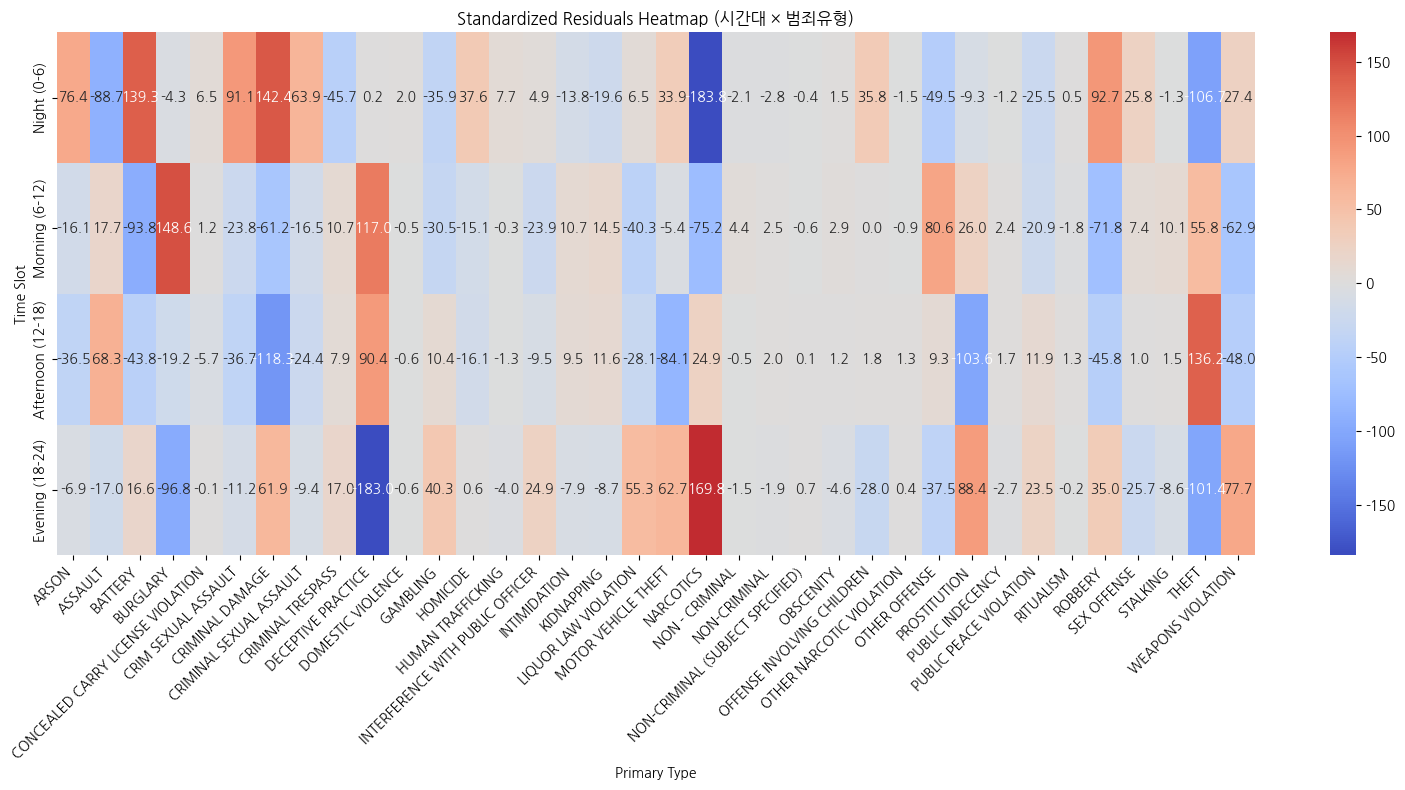

In [61]:
plt.figure(figsize=(16, 8))
sns.heatmap(standardized_residual, cmap="coolwarm", center=0, annot=True, fmt=".1f")
plt.title("Standardized Residuals Heatmap (ÏãúÍ∞ÑÎåÄ √ó Î≤îÏ£ÑÏú†Ìòï)")
plt.xlabel("Primary Type")
plt.ylabel("Time Slot")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**<Í≤∞Í≥º>** <br>
Chi-squared statistic	401,824	Îß§Ïö∞ ÌÅ∞ Í∞í ‚Üí Í¥ÄÏ∏°Í∞íÍ≥º Í∏∞ÎåÄÍ∞íÏùò Ï∞®Ïù¥Í∞Ä ÌÅ¨Îã§<br>
p-value	0.0	0Î≥¥Îã§ Ìõ®Ïî¨ ÏûëÏùå ‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∞ïÌïòÍ≤å Í∏∞Í∞Å <br>
Degrees of freedom	105	(ÏãúÍ∞ÑÎåÄ Í∞úÏàò - 1) √ó (Î≤îÏ£ÑÏú†Ìòï Í∞úÏàò - 1)

**-> ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú Î≤îÏ£Ñ Ïú†ÌòïÏù¥ Îã§Î•¥Í≤å ÎÇòÌÉÄÎÇúÎã§.**

### Í∞ïÎ†•Î≤îÏ£ÑÎßå ÌïÑÌÑ∞ÎßÅÌï¥ÏÑú ÌÜµÍ≥ÑÎ∂ÑÏÑù/ÌûàÌä∏Îßµ

In [9]:
violent_crimes = [
    "HOMICIDE", "CRIMINAL SEXUAL ASSAULT", "ROBBERY", "BATTERY", "RITUALISM",
    "ASSAULT", "BURGLARY", "THEFT", "MOTOR VEHICLE THEFT", "HUMAN TRAFFICKING", "ARSON"
]

In [67]:
# Í∞ïÎ†•Î≤îÏ£Ñ Î¶¨Ïä§Ìä∏
violent_crimes = [
    "HOMICIDE", "CRIMINAL SEXUAL ASSAULT", "ROBBERY", "BATTERY", "RITUALISM",
    "ASSAULT", "BURGLARY", "THEFT", "MOTOR VEHICLE THEFT", "HUMAN TRAFFICKING", "ARSON"
]

# Í∞ïÎ†•Î≤îÏ£ÑÎßå ÌïÑÌÑ∞ÎßÅ
violent_df = chicago[chicago['Primary Type'].isin(violent_crimes)].copy()

# ÏãúÍ∞Ñ Ï†ïÎ≥¥ Ï∂îÏ∂ú
violent_df['Time'] = pd.to_datetime(violent_df['Time'], errors='coerce')
violent_df['Hour'] = violent_df['Time'].dt.hour

# ÏãúÍ∞ÑÎåÄ Î≤îÏ£º ÎßåÎì§Í∏∞
bins = [0, 6, 12, 18, 24]
labels = ['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']
violent_df['Time Slot'] = pd.cut(violent_df['Hour'], bins=bins, labels=labels, right=False)


In [68]:
from scipy.stats import chi2_contingency
import numpy as np

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
cross_tab_violent = pd.crosstab(violent_df['Time Slot'], violent_df['Primary Type'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(cross_tab_violent)

# Cram√©r's V Í≥ÑÏÇ∞
n = cross_tab_violent.values.sum()
min_dim = min(cross_tab_violent.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Ï∂úÎ†•
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print(f"Cram√©r's V: {cramers_v:.4f}")

Chi-squared statistic: 155374.65774339362
p-value: 0.0
Degrees of freedom: 30
Cram√©r's V: 0.1016


In [19]:
# ÏãúÍ∞ÑÎåÄ √ó Í∞ïÎ†•Î≤îÏ£Ñ Ïú†Ìòï ÍµêÏ∞®Ìëú
cross_tab_violent = pd.crosstab(violent_df['Time Slot'], violent_df['Primary Type'])

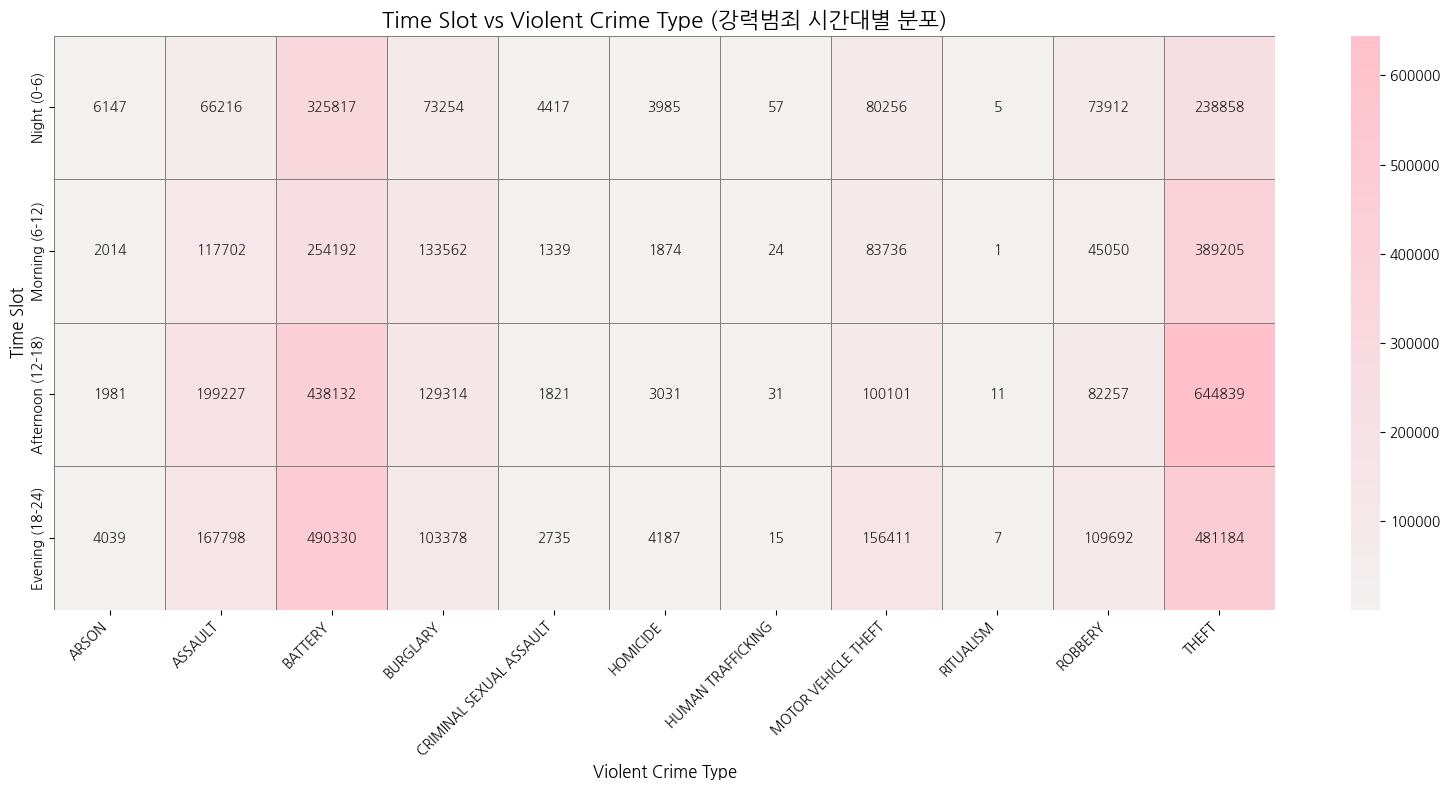

In [20]:
# ÌïëÌÅ¨ Ïª¨Îü¨Îßµ ÏÉùÏÑ±
pink_cmap = sns.light_palette("pink", as_cmap=True)

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(16, 8))
sns.heatmap(cross_tab_violent, annot=True, fmt='d', cmap=pink_cmap, linewidths=0.5, linecolor='gray')

plt.title('Time Slot vs Violent Crime Type (Í∞ïÎ†•Î≤îÏ£Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ Î∂ÑÌè¨)', fontsize=16)
plt.xlabel('Violent Crime Type', fontsize=12)
plt.ylabel('Time Slot', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


BATTERYÏôÄ THEFTÎäî Î™®Îì† ÏãúÍ∞ÑÎåÄÏóêÏÑú ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÍ≥†, ÌäπÌûà Ïò§ÌõÑ(12-18Ïãú), Ï†ÄÎÖÅ(18-24Ïãú)Ïóê ÏßëÏ§ë

ASSAULT, ROBBERY, MOTOR VEHICLE THEFTÎèÑ Ïò§ÌõÑ~Ï†ÄÎÖÅÏóê ÎßéÏïÑÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÎöúÎ†∑Ìï®.

CRIMINAL SEXUAL ASSAULT, HOMICIDEÎäî Í∑úÎ™®Îäî ÏûëÏßÄÎßå Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏïºÍ∞Ñ~Ï†ÄÎÖÅÏóê Î∂ÑÌè¨.

ÏïºÍ∞Ñ(0-6Ïãú)ÏóêÎäî THEFTÍ∞Ä Í∞ÄÏû• ÎßéÍ≥†, BATTERYÎèÑ ÏùÄÍ∑ºÌûà Ï°¥Ïû¨Ìï® ‚Üí Ïù¥ ÏãúÍ∞ÑÎåÄÎèÑ ÏàúÏ∞∞ ÌïÑÏöîÏÑ±Ïù¥ ÏûàÏùå.

      Ï†ïÏ±ÖÏ†ÅÏúºÎ°ú Ïñ¥Îñ§ ÏãúÍ∞ÑÎåÄÏóê Ïñ¥Îñ§ Ïú†ÌòïÏùò Î≤îÏ£ÑÎ•º ÏßëÏ§ëÏ†ÅÏúºÎ°ú ÏòàÎ∞©Ìï†ÏßÄ ÏÑ§Í≥Ñ Í∞ÄÎä•

      ÏàúÏ∞∞ÏãúÍ∞Ñ & Ïû•ÏÜå Ïû¨Î∞∞Ïπò Í∑ºÍ±∞Î°úÎèÑ ÌôúÏö© Í∞ÄÎä•

‚Üí  ÏàúÏ∞∞ ÏãúÍ∞ÑÏóê ÌôúÏö© Í∞ÄÎä•

(Îî∞ÎùºÏÑú Ïò§ÌõÑ~Ï†ÄÎÖÅ ÏãúÍ∞ÑÎåÄÏóê ÏàúÏ∞∞ ÏûêÏõêÏùÑ ÏßëÏ§ëÏ†ÅÏúºÎ°ú Î∞∞ÏπòÌïòÎäî Í≤ÉÏù¥ Ìö®Í≥ºÏ†ÅÏùº Ïàò ÏûàÎã§)

### Í∞ÄÏÑ§ 1 Í≤∞Í≥º

- **Í∑ÄÎ¨¥Í∞ÄÏÑ§(H‚ÇÄ)**: ÏãúÍ∞ÑÎåÄÏôÄ Î≤îÏ£Ñ Ïú†ÌòïÏùÄ Í¥ÄÎ†®Ïù¥ ÏóÜÎã§ (ÎèÖÎ¶ΩÏù¥Îã§)
- **ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H‚ÇÅ)**: ÏãúÍ∞ÑÎåÄÏôÄ Î≤îÏ£Ñ Ïú†ÌòïÏùÄ Í¥ÄÎ†®Ïù¥ ÏûàÎã§ (ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§)

‚Üí p-value 0.0 - 0Î≥¥Îã§ Ìõ®Ïî¨ ÏûëÏùå ‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å

‚Üí Cram√©r's V: 0.1272 ‚Üí ÏïΩÌïú Í¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïúÎã§.

      ‚à¥‚ùóÔ∏è  œá¬≤(105) = 401,824.31, p-value < 0.001Î°ú

          Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥† **ÎåÄÎ¶ΩÍ∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù**ÌñàÏäµÎãàÎã§.

          Ïù¥Îäî **ÏãúÍ∞ÑÎåÄÏôÄ Î≤îÏ£Ñ Ïú†Ìòï ÏÇ¨Ïù¥Ïóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏùåÏùÑ** Î≥¥Ïó¨Ï§çÎãàÎã§.

          ÎòêÌïú, Î≤îÏ£ºÏùò Ïó∞Í¥Ä Ï†ïÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Cram√©r's VÎäî 0.1272Î°ú

          **ÏïΩÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ**ÏßÄÎßå, Ï†ïÏ±ÖÏ†ÅÏúºÎ°ú ÏùòÎØ∏ ÏûàÎäî Ï∞®Ïù¥Îäî Ï°¥Ïû¨ÌïúÎã§Í≥† Î≥º Ïàò ÏûàÎã§.

## Í∞ÄÏÑ§2. Î≤îÏ£Ñ Î∞úÏÉù Ïû•ÏÜå(Location Description)Ïóê Îî∞Îùº Î≤îÏ£Ñ Ïú†Ìòï(Primary Type)Ïù¥ Îã¨ÎùºÏßÑÎã§

In [72]:
# 1. Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df = chicago[['Location Description', 'Primary Type']].dropna()

# 2. ÍµêÏ∞®Ìëú ÏÉùÏÑ±
cross_tab = pd.crosstab(df['Location Description'], df['Primary Type'])

# 3. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 4. Í≤∞Í≥º Ï∂úÎ†•
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 9676208.327321418
p-value: 0.0
Degrees of freedom: 7595


In [73]:
# Ï†ÑÏ≤¥ Í¥ÄÏ∏°Í∞í Ïàò
n = cross_tab.values.sum()

# ÏµúÏÜå Ï∞®Ïõê - 1 (Ìñâ, Ïó¥ Ï§ë ÏûëÏùÄ Í∞í)
min_dim = min(cross_tab.shape) - 1

# Cram√©r's V Í≥ÑÏÇ∞
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Cram√©r's V: {cramers_v:.4f}")

Cram√©r's V: 0.1829


In [24]:
# top 20 Ïû•ÏÜåÎßå ÌïÑÌÑ∞ÎßÅ
top_locations = df['Location Description'].value_counts().head(20).index
df_top = df[df['Location Description'].isin(top_locations)]
cross_tab_top = pd.crosstab(df_top['Location Description'], df_top['Primary Type'])

# Îã§Ïãú Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(cross_tab_top)

# Í≤∞Í≥º Ï∂úÎ†•
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 5018262.186579094
p-value: 0.0
Degrees of freedom: 665


In [25]:
location_mapping = {
    'Ï£ºÍ±∞ÏßÄ': [
        'RESIDENCE', 'APARTMENT', 'HOUSE', 'ROOMING HOUSE',
        'RESIDENCE - GARAGE', 'RESIDENCE-GARAGE', 'RESIDENCE - YARD (FRONT / BACK)',
        'RESIDENCE - PORCH / HALLWAY', 'RESIDENCE PORCH/HALLWAY',
        'DRIVEWAY - RESIDENTIAL', 'GARAGE', 'COACH HOUSE'
    ],
    'ÏÉÅÏóÖÏßÄÍµ¨': [
        'RESTAURANT', 'GROCERY FOOD STORE', 'DEPARTMENT STORE', 'SMALL RETAIL STORE', 'RETAIL STORE',
        'CONVENIENCE STORE', 'HOTEL/MOTEL', 'HOTEL', 'MOTEL', 'BANK', 'CURRENCY EXCHANGE',
        'CREDIT UNION', 'DRUG STORE', 'PAWN SHOP'
    ],
    'ÍµêÌÜµÏãúÏÑ§': [
        'STREET', 'SIDEWALK', 'PARKING LOT', 'PARKING LOT/GARAGE(NON.RESID.)',
        'HIGHWAY/EXPRESSWAY', 'EXPRESSWAY EMBANKMENT', 'ALLEY', 'TAXICAB',
        'CTA BUS', 'CTA TRAIN', 'CTA BUS STOP', 'CTA PLATFORM', 'CTA STATION',
        'CTA SUBWAY STATION', 'CTA GARAGE / OTHER PROPERTY', 'CTA PROPERTY', 'CTA TRACKS - RIGHT OF WAY',
        'VEHICLE - COMMERCIAL', 'VEHICLE - OTHER RIDE SERVICE', 'VEHICLE - DELIVERY TRUCK',
        'VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS', 'AIRPORT/AIRCRAFT',
        'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
        'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
        'AIRPORT PARKING LOT', 'AIRPORT TRANSPORTATION SYSTEM (ATS)'
    ],
    'Í≥µÍ≥µÏãúÏÑ§': [
        'SCHOOL - PUBLIC GROUNDS', 'SCHOOL - PRIVATE BUILDING', 'SCHOOL - PUBLIC BUILDING',
        'SCHOOL, PRIVATE, GROUNDS', 'SCHOOL, PUBLIC, BUILDING', 'SCHOOL, PRIVATE, BUILDING',
        'COLLEGE / UNIVERSITY - GROUNDS', 'COLLEGE / UNIVERSITY - RESIDENCE HALL',
        'PUBLIC GRAMMAR SCHOOL', 'PUBLIC HIGH SCHOOL', 'LIBRARY', 'HOSPITAL',
        'HOSPITAL BUILDING / GROUNDS', 'MEDICAL/DENTAL OFFICE', 'POLICE FACILITY', 'GOVERNMENT BUILDING',
        'GOVERNMENT BUILDING / PROPERTY', 'FIRE STATION', 'YMCA', 'CHURCH', 'CHURCH PROPERTY',
        'CHURCH / SYNAGOGUE / PLACE OF WORSHIP', 'PARK PROPERTY', 'ATHLETIC CLUB', 'MOVIE HOUSE/THEATER',
        'SPORTS ARENA / STADIUM', 'POOL ROOM', 'BOWLING ALLEY'
    ],
    'ÏÇ∞ÏóÖÏãúÏÑ§': [
        'WAREHOUSE', 'FACTORY / MANUFACTURING BUILDING', 'FACTORY',
        'CONSTRUCTION SITE', 'JUNK YARD/GARBAGE DUMP', 'DUMPSTER',
        'GARAGE/AUTO REPAIR', 'LAUNDRY ROOM', 'LOADING DOCK',
        'COIN OPERATED MACHINE', 'ANIMAL HOSPITAL', 'FARM', 'KENNEL',
        'TRUCKING TERMINAL', 'HORSE STABLE', 'AUTO / BOAT / RV DEALERSHIP'
    ],
    'Ïú†Ìù•ÏãúÏÑ§': [
        'CASINO/GAMBLING ESTABLISHMENT', 'TAVERN / LIQUOR STORE', 'BAR OR TAVERN',
        'MOVIE HOUSE/THEATER', 'SPORTS ARENA / STADIUM', 'POOL ROOM', 'BOWLING ALLEY'
    ],
    'Í∏∞ÌÉÄ': [
        'OTHER', 'OTHER (SPECIFY)', 'UNKNOWN', 'FOREST PRESERVE', 'LAKE',
        'LAKEFRONT/WATERFRONT/RIVERBANK', 'LAGOON', 'RIVER', 'RIVER BANK',
        'SEWER', 'BEACH', 'PRAIRIE', 'WOODED AREA', 'BRIDGE'
    ]
}


In [69]:
# Ïû•ÏÜå Ïú†Ìòï Îß§Ìïë
def map_location_category(location):
    for category, loc_list in location_mapping.items():
        if location in loc_list:
            return category
    return 'Í∏∞ÌÉÄ'

chicago['Location Category'] = chicago['Location Description'].apply(map_location_category)

# Í≤∞Ï∏° Ï†úÍ±∞
df_loc = chicago[['Location Category', 'Primary Type']].dropna()

# ÍµêÏ∞®Ìëú ÎßåÎì§Í∏∞
cross_tab_cat = pd.crosstab(df_loc['Location Category'], df_loc['Primary Type'])

In [71]:
from scipy.stats import chi2_contingency
import numpy as np

# Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(cross_tab_cat)

# Ï¥ù Í¥ÄÏ∏°Í∞í Ïàò
n = cross_tab_cat.values.sum()

# Cram√©r's V Í≥ÑÏÇ∞
min_dim = min(cross_tab_cat.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Í≤∞Í≥º Ï∂úÎ†•
print("[Ïû•ÏÜåÏú†Ìòï √ó Î≤îÏ£ÑÏú†Ìòï] ÌÜµÍ≥ÑÎ∂ÑÏÑù Í≤∞Í≥º")
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print(f"Cram√©r's V: {cramers_v:.4f}")


[Ïû•ÏÜåÏú†Ìòï √ó Î≤îÏ£ÑÏú†Ìòï] ÌÜµÍ≥ÑÎ∂ÑÏÑù Í≤∞Í≥º
Chi-squared statistic: 2909025.2135558305
p-value: 0.0
Degrees of freedom: 210
Cram√©r's V: 0.2420


<ipython-input-28-ee71b2410b8a>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


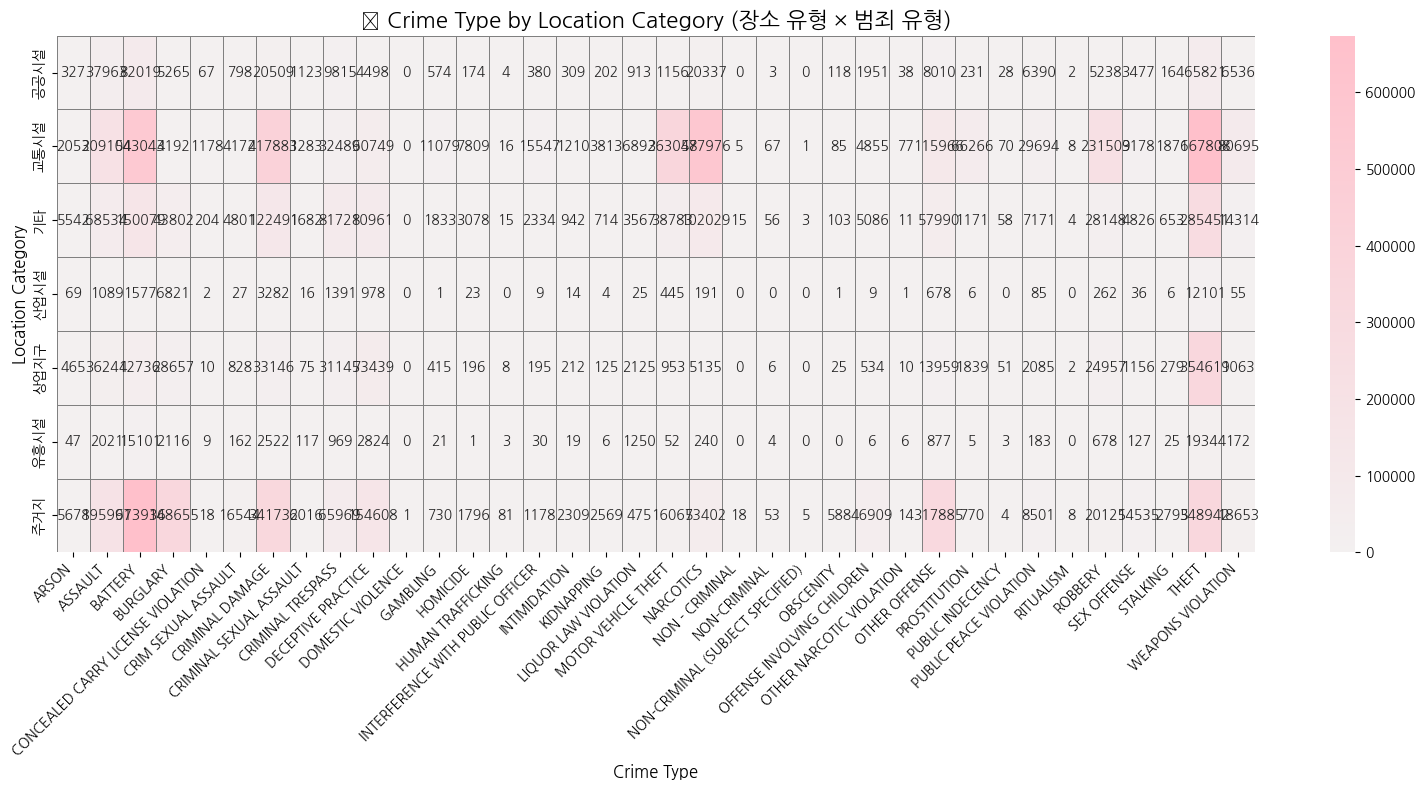

In [28]:
# Ïû•ÏÜå Ïú†Ìòï √ó Î≤îÏ£Ñ Ïú†Ìòï ÍµêÏ∞®Ìëú
cross_tab_cat = pd.crosstab(chicago['Location Category'], chicago['Primary Type'])

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 8))
sns.heatmap(cross_tab_cat, annot=True, fmt='d', cmap=pink_cmap, linewidths=0.5, linecolor='gray')

plt.title('üìä Crime Type by Location Category (Ïû•ÏÜå Ïú†Ìòï √ó Î≤îÏ£Ñ Ïú†Ìòï)', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Location Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-32-d8d2574678ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_df['Location Category'] = violent_df['Location Description'].apply(map_location_category)


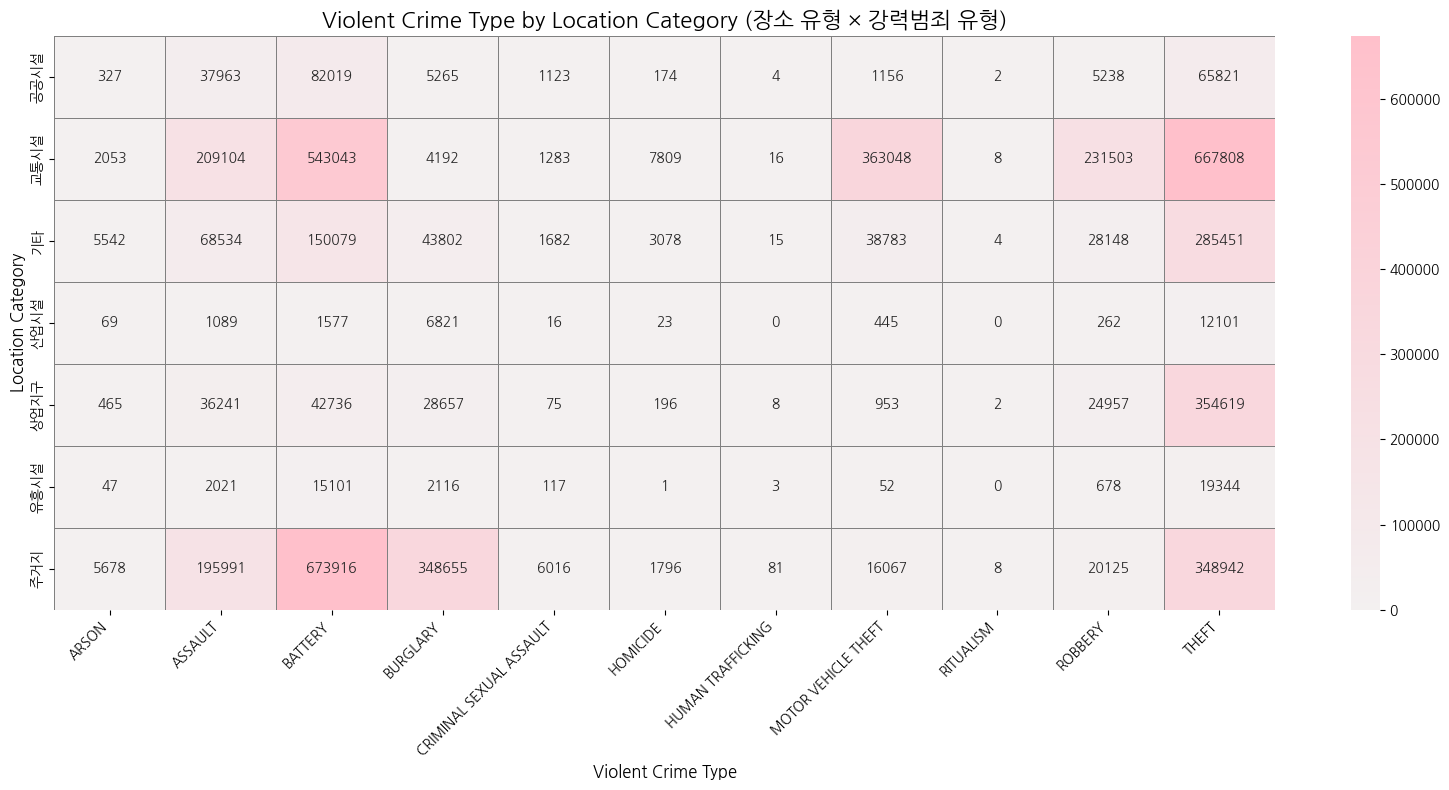

In [32]:
violent_df['Location Category'] = violent_df['Location Description'].apply(map_location_category)

# Ïû•ÏÜåÏú†Ìòï √ó Í∞ïÎ†•Î≤îÏ£Ñ ÍµêÏ∞®Ìëú
cross_tab_violent_cat = pd.crosstab(violent_df['Location Category'], violent_df['Primary Type'])

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(16, 8))
sns.heatmap(cross_tab_violent_cat, annot=True, fmt='d', cmap=pink_cmap, linewidths=0.5, linecolor='gray')

plt.title('Violent Crime Type by Location Category (Ïû•ÏÜå Ïú†Ìòï √ó Í∞ïÎ†•Î≤îÏ£Ñ Ïú†Ìòï)', fontsize=16)
plt.xlabel('Violent Crime Type', fontsize=12)
plt.ylabel('Location Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

| Ïû•ÏÜå Ïú†Ìòï   | ÌäπÏßïÏ†ÅÏù∏ Í∞ïÎ†•Î≤îÏ£Ñ Ïú†Ìòï           | ÏÑ§Î™Ö                                                         |
|-------------|-------------------------------|--------------------------------------------------------------|
| Ï£ºÍ±∞ÏßÄ      | BATTERY, BURGLARY, THEFT      | Ìè≠Ìñâ, Ï†àÎèÑ, ÎèÑÎÇúÏù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùå                         |
| ÍµêÌÜµÏãúÏÑ§    | THEFT, ROBBERY, BATTERY       | ÏÜåÎß§ÏπòÍ∏∞, Í∞ïÎèÑ Îì± Í±∞Î¶¨ÏóêÏÑú Î∞úÏÉùÌïòÎäî Î≤îÏ£Ñ ÎπàÎèÑ ÎÜíÏùå         |
| Í≥µÍ≥µÏãúÏÑ§    | BATTERY, THEFT                | Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Í±¥ÏàòÎäî ÎÇÆÏßÄÎßå ÌäπÏ†ï Î≤îÏ£Ñ Ïú†Ìòï Ï°¥Ïû¨               |
| ÏÉÅÏóÖÏßÄÍµ¨    | THEFT, BATTERY, ASSAULT       | ÏÉÅÏ†ê Îì±ÏóêÏÑú ÎèÑÎÇú, Ìè≠Î†• Í¥ÄÎ†® Î≤îÏ£Ñ ÎπÑÏú® ÎÜíÏùå                |
| Í∏∞ÌÉÄ        | BATTERY, THEFT                | Îã§ÏñëÌïú Í≥µÍ∞ÑÏóêÏÑú ÎπÑÍµêÏ†Å Í≥†Î•¥Í≤å Î∞úÏÉùÌïòÏßÄÎßå Ìè≠Ìñâ, ÎèÑÎÇú Ï§ëÏã¨  |


‚Üí ÏÉÅÏóÖÏßÄÍµ¨ÏóêÎäî Ï†àÎèÑ Î∞©ÏßÄÎ•º ÏúÑÌïú CCTV Í∞ïÌôî, ÍµêÌÜµÏãúÏÑ§ÏóêÎäî Í∞ÄÏãúÏ†Å ÏàúÏ∞∞ Í∞ïÌôîÍ∞Ä ÌïÑÏöîÌï† Ïàò ÏûàÏùå

### Í∞ÄÏÑ§ 2 Í≤∞Í≥º
(Ïû•ÏÜåÏú†ÌòïÏù¥ ÎßéÏïÑ ÌëúÎ≥∏Ïù¥ ÎÑàÎ¨¥ ÌÅ¨ÎØÄÎ°ú Ïû•ÏÜåÎ≥ÑÎ°ú Ïú†ÌòïÏùÑ Î¨∂Ïñ¥ÏÑú Í≥ÑÏÇ∞)

- **H‚ÇÄ (Í∑ÄÎ¨¥Í∞ÄÏÑ§)**: Ïû•ÏÜå Ïú†Ìòï(Î≤îÏ£º)Í≥º Î≤îÏ£Ñ Ïú†ÌòïÏùÄ Í¥ÄÎ†®Ïù¥ ÏóÜÎã§ (ÎèÖÎ¶ΩÏù¥Îã§)
- **H‚ÇÅ (ÎåÄÎ¶ΩÍ∞ÄÏÑ§)**: Ïû•ÏÜå Ïú†ÌòïÏóê Îî∞Îùº Î≤îÏ£Ñ Ïú†ÌòïÏù¥ Îã¨ÎùºÏßÑÎã§ (ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§)

‚Üí  p-value: 0.0  Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥† ÎåÄÎ¶ΩÍ∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§.

‚Üí Cram√©r's V: 0.2420 ‚Üí ÏïΩÌïú Í¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïúÎã§.


      ‚à¥ ‚ùóÔ∏è  Î≤îÏ£ÑÍ∞Ä Î∞úÏÉùÌïú Ïû•ÏÜåÏú†ÌòïÏùÑ Î≤îÏ£ºÎ°ú ÎÇòÎàÑÏñ¥ÏÑú Î≤îÏ£Ñ Ïú†ÌòïÏù¥ Îã¨ÎùºÏßÄÎäîÏßÄÎ•º Í≤ÄÏ†ïÌïú Í≤∞Í≥º,
          œá¬≤(210) = 2,909,025.21, p-value < 0.001Î°ú
          Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∞ïÌïòÍ≤å Í∏∞Í∞ÅÌïòÍ≥†, Ïû•ÏÜåÏôÄ Î≤îÏ£Ñ Ïú†Ìòï Í∞ÑÏùò Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÎ•º ÌôïÏù∏ÌñàÏäµÎãàÎã§.

          Cram√©r's VÎäî 0.2420ÏúºÎ°ú, ÏãúÍ∞ÑÎåÄÎ≥¥Îã§ Îçî Í∞ïÌïú ÏàòÏ§ÄÏùò Í¥ÄÍ≥ÑÎ•º Î≥¥ÏòÄÏäµÎãàÎã§.


‚ñ∫ Îã§Î•∏ ÏöîÏù∏Îì§(ÏÇ¨ÌöåÏ†Å ÏöîÏù∏ Îì±)ÏùÑ Ìï®Íªò Í≥†Î†§Ìï¥Ïïº Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏïÑÏßà Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

## Í∞ÄÏÑ§3. Î≤îÏ£ÑÏóê Îî∞Îùº Ï≤¥Ìè¨Ïú®Ïù¥ Îã§Î•¥Îã§.

In [5]:
from scipy.stats import chi2_contingency

In [6]:
# 1. ÍµêÏ∞®Ìëú ÎßåÎì§Í∏∞: Î≤îÏ£ÑÏú†Ìòï √ó Ï≤¥Ìè¨Ïó¨Î∂Ä
contingency = pd.crosstab(chicago['Primary Type'], chicago['Arrest'])

# 2. Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(contingency)

# 3. Í≤∞Í≥º Ï∂úÎ†•
print(f"Chi-squared statistic: {chi2:,.2f}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-squared statistic: 3,587,036.96
p-value: 0.0
Degrees of freedom: 35


In [8]:
import numpy as np

In [9]:
# 3. Cram√©r's V Í≥ÑÏÇ∞
n = contingency.sum().sum()  # Ï†ÑÏ≤¥ ÌëúÎ≥∏ Ïàò
min_dim = min(contingency.shape) - 1  # ÏûêÏú†ÎèÑ Í≥ÑÏÇ∞Ïö© (Ìñâ ÎòêÎäî Ïó¥ Ï§ë Îçî ÏûëÏùÄ Í∞í - 1)
cramers_v = np.sqrt(chi2 / (n * min_dim))

# 4. Í≤∞Í≥º Ï∂úÎ†•
print(f"Cram√©r's V: {cramers_v:.4f}")

Cram√©r's V: 0.6583


Î≤îÏ£Ñ Ïú†ÌòïÍ≥º Ï≤¥Ìè¨ Ïó¨Î∂Ä Í∞ÑÏùò ÎèÖÎ¶ΩÏÑ±ÏùÑ Í≤ÄÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º,

œá¬≤(35) = 3,587,036.96, p < 0.001Î°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Í∏∞Í∞ÅÎêòÏóàÎã§.

Ïù¥Îäî Î≤îÏ£Ñ Ïú†ÌòïÏóê Îî∞Îùº Ï≤¥Ìè¨Ïú®Ïù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î•¥Î©∞,

ÌäπÏ†ï Î≤îÏ£Ñ Ïú†ÌòïÏóêÏÑú Ï≤¥Ìè¨Í∞Ä ÌäπÌûà ÌôúÎ∞úÌïòÍ±∞ÎÇò Î∞òÎåÄÎ°ú Ï†ÄÏ°∞ÌïòÍ≤å Ïù¥Î£®Ïñ¥ÏßÄÍ≥† ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.

    œá¬≤(35) = 3,587,036.96, p < 0.001
    Î≤îÏ£Ñ Ïú†ÌòïÏóê Îî∞Îùº Ï≤¥Ìè¨Ïú®Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î•¥Îã§.

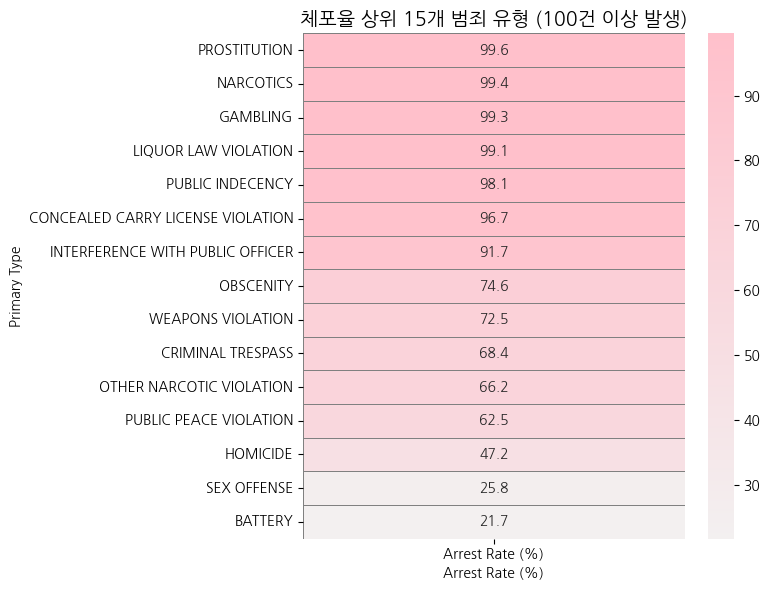

In [36]:
# Primary TypeÎ≥Ñ Ï≤¥Ìè¨ ÎπÑÏú® Í≥ÑÏÇ∞
arrest_ratio = chicago.groupby('Primary Type')['Arrest'].agg(['sum', 'count'])
arrest_ratio['Arrest Rate (%)'] = (arrest_ratio['sum'] / arrest_ratio['count']) * 100

# 100Í±¥ Ïù¥ÏÉÅ Î∞úÏÉùÌïú Î≤îÏ£Ñ Ïú†ÌòïÎßå ÌïÑÌÑ∞ÎßÅ
arrest_filtered = arrest_ratio[arrest_ratio['count'] >= 100]

# ÏÉÅÏúÑ 15Í∞ú Ï†ïÎ†¨
top15_arrest = arrest_filtered.sort_values('Arrest Rate (%)', ascending=False).head(15)

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ï†ïÎ¶¨
top15_arrest_df = top15_arrest[['Arrest Rate (%)']]

# ÌïëÌÅ¨ Ïª¨Îü¨Îßµ
pink_cmap = sns.light_palette("pink", as_cmap=True)

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(8, 6))
sns.heatmap(top15_arrest_df, annot=True, fmt=".1f", cmap=pink_cmap, linewidths=0.5, linecolor='gray')
plt.title('Ï≤¥Ìè¨Ïú® ÏÉÅÏúÑ 15Í∞ú Î≤îÏ£Ñ Ïú†Ìòï (100Í±¥ Ïù¥ÏÉÅ Î∞úÏÉù)', fontsize=14)
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

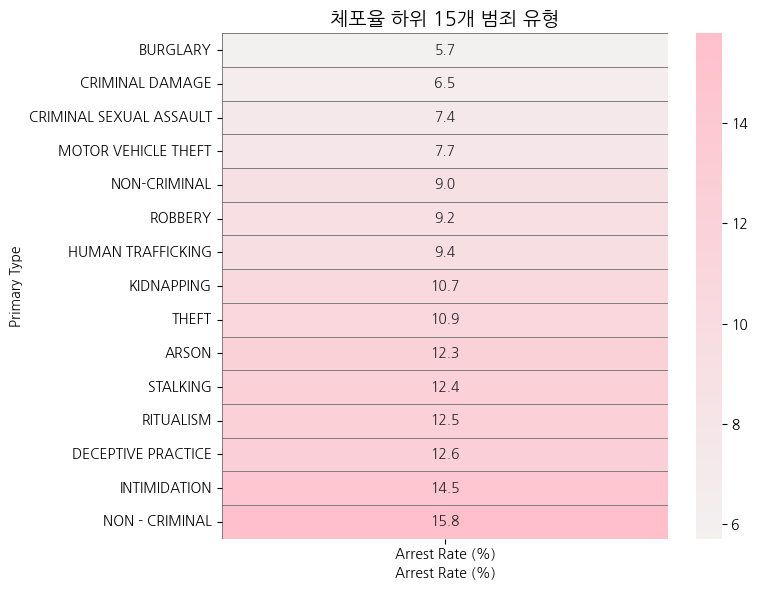

In [42]:
# ÌïòÏúÑ 5Í∞ú Ï†ïÎ†¨
bottom15_arrest = arrest_ratio.sort_values('Arrest Rate (%)', ascending=True).head(15)

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ï†ïÎ¶¨
bottom15_arrest_df = bottom15_arrest[['Arrest Rate (%)']]

# ÌïëÌÅ¨ Ïª¨Îü¨Îßµ
pink_cmap = sns.light_palette("pink", as_cmap=True)

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(8, 6))
sns.heatmap(bottom15_arrest_df, annot=True, fmt=".1f", cmap=pink_cmap, linewidths=0.5, linecolor='gray')
plt.title('Ï≤¥Ìè¨Ïú® ÌïòÏúÑ 15Í∞ú Î≤îÏ£Ñ Ïú†Ìòï', fontsize=14)
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

Ï≤¥Ìè¨Ïú® ÎÜíÏùÄ Î≤îÏ£Ñ Ïú†Ìòï

	ÎåÄÎ∂ÄÎ∂Ñ Í≥µÍ≥µÏßàÏÑú ÏúÑÎ∞òÏù¥ÎÇò Îã®ÏÜçÏù¥ Ïâ¨Ïö¥ ÌñâÏúÑ (ÎßàÏïΩ, ÎèÑÎ∞ï, Ïà†Î≤ï ÏúÑÎ∞ò Îì±) Ï§ëÏã¨

Ï≤¥Ìè¨Ïú® ÎÇÆÏùÄ Î≤îÏ£Ñ Ïú†Ìòï

	ÌîºÌï¥Ïûê Í∏∞Î∞ò, ÏùÄÎ∞ÄÌïú Ïû•ÏÜå Î∞úÏÉù, Ï¶ùÍ±∞ ÏàòÏßë Ïñ¥Î†§ÏõÄ (Ï†àÎèÑ, ÏÑ±Î≤îÏ£Ñ, Ï∞®ÎüâÏ†àÎèÑ Îì±)

* Îã®ÏÜç Í∞ÄÎä•Ìïú Î≤îÏ£ÑÏóê Ï≤¥Ìè¨Ïú®Ïù¥ Î™∞Î†§ ÏûàÎã§

‚Üí Î≤ïÏùò ÎààÏù¥ ÏâΩÍ≤å ÎãøÎäî Î≤îÏ£ÑÎßå Ï≤òÎ¶¨ÎêòÍ≥† ÏûàÎäî Í±¥ ÏïÑÎãêÍπå?

* Ï£ºÏöî Í∞ïÎ†•Î≤îÏ£ÑÏùò Ï≤¥Ìè¨Ïú® ÎÇÆÏùå

‚Üí ÏãúÎØºÏóêÍ≤å ÏúÑÌòëÏù¥ ÎêòÎäî Î≤îÏ£ÑÏóê ÏûêÏõêÏù¥ Ï†úÎåÄÎ°ú Ìà¨ÏûÖÎêòÍ≥† ÏûàÎäîÏßÄ?

**Ïû•ÏÜå Ïú†Ìòï √ó Í∞ïÎ†•Î≤îÏ£Ñ Ïú†Ìòï Ï≤¥Ìè¨Ïú® ÌûàÌä∏Îßµ**

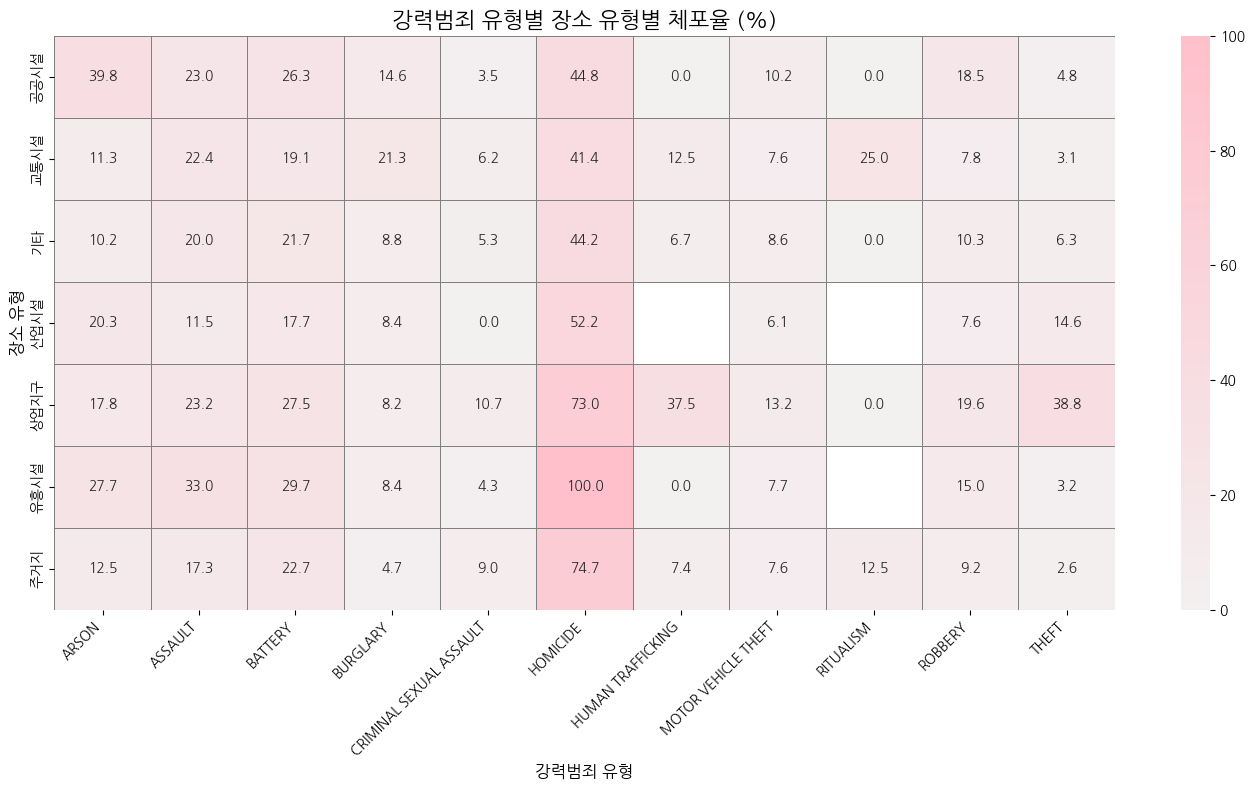

In [47]:
# Ïû•ÏÜå Ïú†Ìòï ÏÇ¨Ï†Ñ (Ïù¥Ï†ÑÏóê ÎßåÎì† Í≤É ÏÇ¨Ïö©)

# Í∑∏Î£πÌôî: Î≤îÏ£Ñ Ïú†Ìòï + Ïû•ÏÜå Ïπ¥ÌÖåÍ≥†Î¶¨
grouped_loc = violent_df.groupby(['Primary Type', 'Location Category'])['Arrest'].agg(['count', 'sum']).reset_index()
grouped_loc['Arrest Rate (%)'] = (grouped_loc['sum'] / grouped_loc['count']) * 100

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
pivot_loc = grouped_loc.pivot(index='Location Category', columns='Primary Type', values='Arrest Rate (%)')

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_loc, annot=True, fmt=".1f", cmap=sns.light_palette("pink", as_cmap=True), linewidths=0.5, linecolor='gray')

plt.title("Í∞ïÎ†•Î≤îÏ£Ñ Ïú†ÌòïÎ≥Ñ Ïû•ÏÜå Ïú†ÌòïÎ≥Ñ Ï≤¥Ìè¨Ïú® (%)", fontsize=16)
plt.xlabel("Í∞ïÎ†•Î≤îÏ£Ñ Ïú†Ìòï", fontsize=12)
plt.ylabel("Ïû•ÏÜå Ïú†Ìòï", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

HOMICIDEÎäî Ïú†Ìù•ÏãúÏÑ§(100%), ÏÇ∞ÏóÖÏãúÏÑ§(73%), Ï£ºÍ±∞ÏßÄ(74.7%) Îì± Îã§ÏñëÌïú Ïû•ÏÜåÏóêÏÑú ÎÜíÏùÄ Ï≤¥Ìè¨Ïú®ÏùÑ Î≥¥ÏûÑ.

BURGLARY, THEFTÎäî Í±∞Ïùò Î™®Îì† Ïû•ÏÜåÏóêÏÑú Ï≤¥Ìè¨Ïú®Ïù¥ ÎÇÆÏùå (Ï£ºÍ±∞ÏßÄ ÎÇ¥ THEFT Ï≤¥Ìè¨Ïú® 2.6%)

ASSAULT, BATTERY Îì± Ïã†Ï≤¥Ï†Å Ï∂©Îèå Ï§ëÏã¨Ïùò Î≤îÏ£ÑÎäî Í≥µÍ≥µÏãúÏÑ§Ïù¥ÎÇò ÏÉÅÏóÖÏßÄÍµ¨ÏóêÏÑú ÎπÑÍµêÏ†Å Ï≤¥Ìè¨Ïú®Ïù¥ ÎÜíÏùå.

-> **Ïû•ÏÜåÎ≥ÑÎ°ú Ï≤¥Ìè¨ Í∞ÄÎä•ÏÑ±(ÏàòÏÇ¨ Ïö©Ïù¥ÏÑ±)**Ïù¥ Îã¨ÎùºÏßà Ïàò ÏûàÎã§

**ÏãúÍ∞ÑÎåÄ √ó Í∞ïÎ†•Î≤îÏ£Ñ Ïú†Ìòï Ï≤¥Ìè¨Ïú® ÌûàÌä∏Îßµ**

<ipython-input-49-896f8f60efed>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_df['Hour'] = pd.to_datetime(violent_df['Time'], errors='coerce').dt.hour
<ipython-input-49-896f8f60efed>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_df['Time Slot'] = violent_df['Hour'].apply(time_slot)


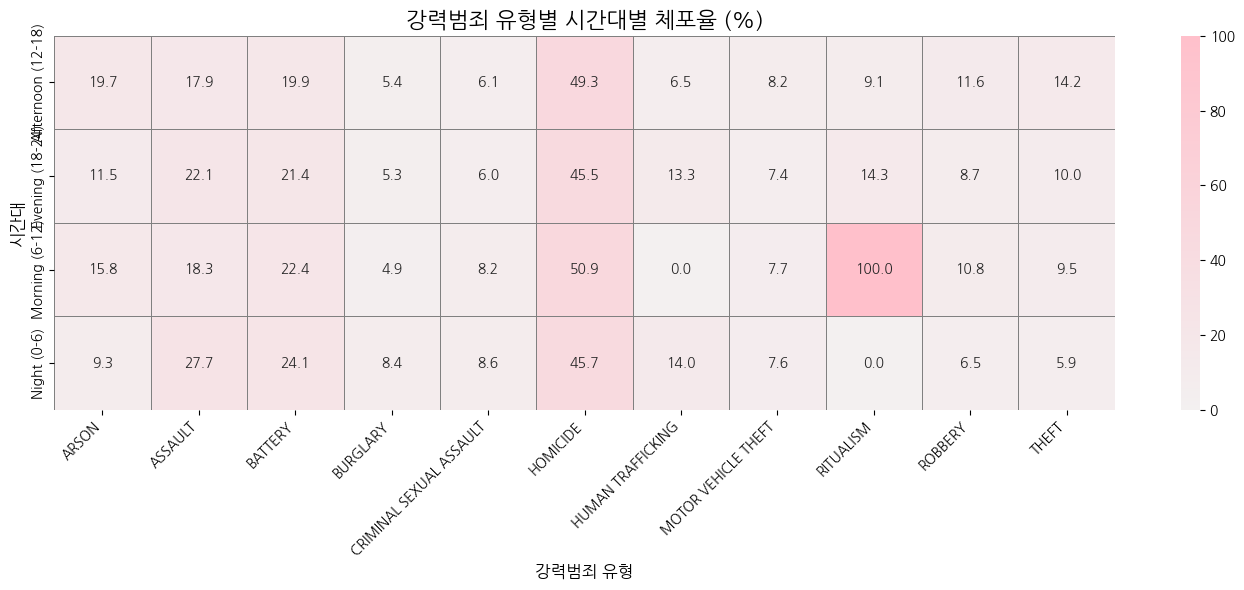

In [49]:
# ÏãúÍ∞ÑÎåÄ Íµ¨Î∂Ñ Ìï®Ïàò
def time_slot(hour):
    if 0 <= hour < 6:
        return 'Night (0-6)'
    elif 6 <= hour < 12:
        return 'Morning (6-12)'
    elif 12 <= hour < 18:
        return 'Afternoon (12-18)'
    else:
        return 'Evening (18-24)'

violent_df['Hour'] = pd.to_datetime(violent_df['Time'], errors='coerce').dt.hour
violent_df['Time Slot'] = violent_df['Hour'].apply(time_slot)

# Í∑∏Î£πÌôî: Î≤îÏ£Ñ Ïú†Ìòï + ÏãúÍ∞ÑÎåÄ
grouped_time = violent_df.groupby(['Primary Type', 'Time Slot'])['Arrest'].agg(['count', 'sum']).reset_index()
grouped_time['Arrest Rate (%)'] = (grouped_time['sum'] / grouped_time['count']) * 100

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
pivot_time = grouped_time.pivot(index='Time Slot', columns='Primary Type', values='Arrest Rate (%)')

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_time, annot=True, fmt=".1f", cmap=sns.light_palette("pink", as_cmap=True), linewidths=0.5, linecolor='gray')

plt.title("Í∞ïÎ†•Î≤îÏ£Ñ Ïú†ÌòïÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï≤¥Ìè¨Ïú® (%)", fontsize=16)
plt.xlabel("Í∞ïÎ†•Î≤îÏ£Ñ Ïú†Ìòï", fontsize=12)
plt.ylabel("ÏãúÍ∞ÑÎåÄ", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Ï≤¥Ìè¨Ïú®Ïù¥ ÎÜíÏùÄ Î≤îÏ£Ñ Ïú†Ìòï
    - **PROSTITUTION, NARCOTICS, GAMBLING** Îì±ÏùÄ Ï≤¥Ìè¨Ïú®Ïù¥ 99%Ïóê Í∞ÄÍπåÏõÄ
    - Ïù¥Îì§ Î≤îÏ£ÑÎäî **Îã®ÏÜçÏù¥ ÏßëÏ§ëÎêòÍ±∞ÎÇò ÌòÑÏû•ÏóêÏÑú Ï†ÅÎ∞úÎêòÎäî Î≤îÏ£Ñ**Î°ú, **Ï≤¥Ìè¨ ÌôïÎ•†Ïù¥ ÎÜíÏùå**
- Ï≤¥Ìè¨Ïú®Ïù¥ ÎÇÆÏùÄ Î≤îÏ£Ñ Ïú†Ìòï(**Ï£ºÏöî Í∞ïÎ†•Î≤îÏ£ÑÏùò Ï≤¥Ìè¨Ïú® ÎÇÆÏùå)
    - **BURGLARY, CRIMINAL DAMAGE, CRIMINAL SEXUAL ASSAULT** Îì±ÏùÄ Ï≤¥Ìè¨Ïú®Ïù¥ 5~15% ÏàòÏ§Ä
    - Ïù¥Îü¨Ìïú Î≤îÏ£ÑÎäî **ÌîºÌï¥ Ïù¥ÌõÑ Î∞úÍ≤¨ÎêòÍ±∞ÎÇò, ÌîºÏùòÏûê Ï∂îÏ†ÅÏù¥ Ïñ¥Î†§Ïö¥ Í≤ΩÏö∞**Í∞Ä ÎßéÏïÑ Ï≤¥Ìè¨Ïú®Ïù¥ ÎÇÆÏùå

‚Üí Ï≤¥Ìè¨Ïú®Ïù¥ ÎÜíÏùÄ Î≤îÏ£Ñ: Ï£ºÎ°ú **ÌòÑÏû•ÏóêÏÑú Î∞îÎ°ú Ï†ÅÎ∞úÎêòÎäî Î≤îÏ£Ñ/** ÎÇÆÏùÄ Î≤îÏ£Ñ: **ÏÇ¨ÌõÑ Î∞úÍ≤¨ÎêòÍ±∞ÎÇò Ï¶ùÍ±∞ ÌôïÎ≥¥Í∞Ä Ïñ¥Î†§Ïö¥ Î≤îÏ£Ñ**)

‚Üí Ïã§Ï†úÎ°úÎèÑ Ï≤¥Ìè¨Ïú®Ïù¥ Îß§Ïö∞ ÎÜíÏùÄ Î≤îÏ£ÑÏôÄ ÎÇÆÏùÄ Î≤îÏ£ÑÍ∞Ä ÎöúÎ†∑Ïù¥ ÎÇòÎâòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
    Ïù¥Îäî Î≤îÏ£Ñ Ïú†ÌòïÎ≥ÑÎ°ú ÏàòÏÇ¨ ÎÇúÏù¥ÎèÑÎÇò Îã®ÏÜç Í∞ÄÎä•ÏÑ±Ïùò Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
    Ìñ•ÌõÑ Ï†ïÏ±ÖÏù¥ÎÇò ÏûêÏõêÎ∞∞Î∂ÑÏóê Ïú†ÏùòÎØ∏ÌïòÍ≤å ÏÇ¨Ïö©Îê† Ïàò ÏûàÎäî Í∏∞Ï¥àÏûêÎ£åÎùºÍ≥† ÏÉùÍ∞ÅÌï©ÎãàÎã§.

ex) Ï≤¥Ìè¨Ïú®Ïù¥ ÎÇÆÏùÄ Î≤îÏ£Ñ Ïú†ÌòïÏóê ÎåÄÌïú Ï†ÑÎã¥ ÏàòÏÇ¨ Ïù∏Î†• Í∞ïÌôî ÎòêÎäî Ïã†Í≥† ÏãúÏä§ÌÖú Í∞úÏÑ† ÏöîÍµ¨

### Í∞ÄÏÑ§ 3 Í≤∞Í≥º

- Í∑ÄÎ¨¥Í∞ÄÏÑ§(H‚ÇÄ) :  Î≤îÏ£Ñ Ïú†ÌòïÍ≥º Ï≤¥Ìè¨ Ïó¨Î∂ÄÎäî ÏÑúÎ°ú ÎèÖÎ¶ΩÏ†ÅÏù¥Îã§.
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H‚ÇÅ) : Î≤îÏ£Ñ Ïú†ÌòïÍ≥º Ï≤¥Ìè¨ Ïó¨Î∂ÄÎäî ÏÑúÎ°ú Í¥ÄÎ†®Ïù¥ ÏûàÎã§.

‚Üí  p-value: 0.0  Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥† ÎåÄÎ¶ΩÍ∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§.

‚Üí Cram√©r's V:  0.6583 ‚Üí Í∞ïÌïú Í¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïúÎã§. (Î≤îÏ£Ñ Ïú†ÌòïÏóê Îî∞Îùº Ï≤¥Ìè¨Ïú®Ïù¥ Îß§Ïö∞ Îã¨ÎùºÏßÑÎã§)


      ‚à¥ ‚ùóÔ∏èÎ≤îÏ£Ñ Ïú†ÌòïÍ≥º Ï≤¥Ìè¨ Ïó¨Î∂Ä Í∞ÑÏùò ÎèÖÎ¶ΩÏÑ±ÏùÑ Í≤ÄÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º,

        œá¬≤(35) = 3,587,036.96, p < 0.001Î°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥† Î≤îÏ£Ñ Ïú†ÌòïÍ≥º Ï≤¥Ìè¨Ïú® Í∞ÑÏùò Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÎ•º ÌôïÏù∏ÌñàÏäµÎãàÎã§.

        ÌäπÌûà **Cram√©r‚Äôs V = 0.6 Ïù¥ÏÉÅ**ÏúºÎ°ú, Ïù¥Îäî**Îëê Î≥ÄÏàò Í∞Ñ Îß§Ïö∞ Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ**Î•º ÏùòÎØ∏Ìï©ÎãàÎã§.

### Í∞ÄÏÑ§ 3 Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î∂ÑÏÑù

In [10]:
import pandas as pd
import statsmodels.formula.api as smf

In [11]:
# ArrestÎäî True/False ‚Üí Ïà´ÏûêÎ°ú Î∞îÍøî
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
logit_df = chicago[['Primary Type', 'Arrest']].dropna().copy()
logit_df['Arrest'] = logit_df['Arrest'].astype(int)

Î≤îÏ£Ñ Ïú†Ìòï(Primary Type)Ïóê Îî∞Îùº Ï≤¥Ìè¨ Ïó¨Î∂Ä(Arrest)Í∞Ä Îã¨ÎùºÏßÄÎäîÍ∞Ä?"

Ï¢ÖÏÜçÎ≥ÄÏàò: Arrest ‚Üí 0 ÎòêÎäî 1 (0: Ï≤¥Ìè¨ Ïïà Îê®, 1: Ï≤¥Ìè¨Îê®) -> Ïù¥Ìï≠Î∂ÑÎ•ò

ÎèÖÎ¶ΩÎ≥ÄÏàò: Primary Type ‚Üí Î≤îÏ£Ñ Ïú†Ìòï (Î≤îÏ£ºÌòï Î≥ÄÏàò)



In [14]:
model = smf.logit("Arrest ~ C(Q('Primary Type'))", data=logit_df).fit()

         Current function value: 0.357277
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- Ïó¨Í∏∞ÏÑú Í∏∞Ï§ÄÏùÄ **THEFT (Ï†àÎèÑ)**ÏûÖÎãàÎã§. (ÎπàÎèÑÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏïÑ ÏûêÎèôÏÑ§Ï†ïÎê®)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Arrest   No. Observations:              8276672
Model:                          Logit   Df Residuals:                  8276636
Method:                           MLE   Df Model:                           35
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.3694
Time:                        08:08:30   Log-Likelihood:            -2.9571e+06
converged:                      False   LL-Null:                   -4.6896e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    -1.9651      0.026    -76.836      0.000      -2.015      -1.915
C(Q('Primary Type'))[T.ASSAULT]                               0.6044      0.026     23.433      0.000       0.554       0.655
C(Q('Primary Type'))[T.BATTERY]                               0.6824      0.026     26.600      0.000       0.632       0.733
C(Q('Primary Type'))[T.BURGLARY]                             -0.8382      0.026    -31.764      0.000      -0.890      -0.786
C(Q('Primary Type'))[T.CONCEALED CARRY LICENSE VIOLATION]     5.3450      0.148     36.237      0.000       5.056       5.634
C(Q('Primary Type'))[T.CRIM SEXUAL ASSAULT]                   0.3042      0.030      9.991      0.000       0.244       0.364
C(Q('Primary Type'))[T.CRIMINAL DAMAGE]                      -0.6953      0.026    -26.832      0.000      -0.746      -0.645
C(Q('Primary Type'))[T.CRIMINAL SEXUAL ASSAULT]              -0.5604      0.045    -12.323      0.000      -0.649      -0.471
C(Q('Primary Type'))[T.CRIMINAL TRESPASS]                     2.7378      0.026    105.393      0.000       2.687       2.789
C(Q('Primary Type'))[T.DECEPTIVE PRACTICE]                    0.0243      0.026      0.931      0.352      -0.027       0.075
C(Q('Primary Type'))[T.DOMESTIC VIOLENCE]                    17.9088   2898.123      0.006      0.995   -5662.307    5698.125
C(Q('Primary Type'))[T.GAMBLING]                              6.8868      0.101     68.335      0.000       6.689       7.084
C(Q('Primary Type'))[T.HOMICIDE]                              1.8523      0.031     59.753      0.000       1.792       1.913
C(Q('Primary Type'))[T.HUMAN TRAFFICKING]                    -0.2949      0.304     -0.969      0.333      -0.892       0.302
C(Q('Primary Type'))[T.INTERFERENCE WITH PUBLIC OFFICER]      4.3653      0.036    120.115      0.000       4.294       4.437
C(Q('Primary Type'))[T.INTIMIDATION]                          0.1873      0.048      3.934      0.000       0.094       0.281
C(Q('Primary Type'))[T.KIDNAPPING]                           -0.1613      0.045     -3.548      0.000      -0.250      -0.072
C(Q('Primary Type'))[T.LIQUOR LAW VIOLATION]                  6.6250      0.088     75.434      0.000       6.453       6.797
C(Q('Primary Type'))[T.MOTOR VEHICLE THEFT]                  -0.5235      0.026    -19.962      0.000      -0.575      -0.472
C(Q('Primary Type'))[T.NARCOTICS]                             7.0338      0.029    239.003      0.000       6.976       7.091
C(Q('Primary Type'))[T.NON - CRIMINAL]                        0.2912      0.446      0.653      0.513      -0.582       1.165
C(Q('Primary Type'))[T.NON-CRIMINAL]                         -0.3491      0.256     -1.366      0.172      -0.850       0.152
C(Q('Primary Type'))[T.NON-CRIMINAL (SUBJECT SPECIFIED)]      1.2720      0.708      1.798 

**Domestic Violence, Ritualism Í∞ôÏùÄ ÏùºÎ∂Ä Ìï≠Î™©ÏùÄ ÌëúÎ≥∏ ÏàòÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÍ±∞ÎÇò Í≥ÑÏÇ∞Ïù¥ Î∂àÏïàÏ†ï**

‚ñ∫ Ï≤¥Ìè¨ ÌôïÎ•†Ïù¥ ÎÜíÏùÄ Î≤îÏ£ÑÏú†Ìòï (coef ÏñëÏàò)

| Î≤îÏ£Ñ Ïú†Ìòï                    | Í≥ÑÏàò (coef) | Ìï¥ÏÑù                                  |
|-----------------------------|-------------|----------------------------------------|
| PROSTITUTION                | 7.42        | Ï≤¥Ìè¨ ÌôïÎ•† Îß§Ïö∞ ÎÜíÏùå (ÌòÑÏû• Ï†ÅÎ∞ú Í∞ÄÎä•ÏÑ±) |
| NARCOTICS                   | 7.03        | ÎßàÏïΩ ‚Üí Í∞ïÎ†• Îã®ÏÜç ÎåÄÏÉÅ                  |
| GAMBLING                    | 6.88        | Î∂àÎ≤ï ÎèÑÎ∞ïÎèÑ Í≥†ÌôïÎ•† Ï≤¥Ìè¨               |
| LIQUOR LAW VIOLATION        | 6.62        | Ï£ºÎ•ò ÏúÑÎ∞òÎèÑ Îã®ÏÜç Ï§ëÏã¨                 |
| WEAPONS VIOLATION           | 2.93        | Ï≤¥Ìè¨ ÌôïÎ•† Îß§Ïö∞ ÎÜíÏùå                   |
| PUBLIC PEACE VIOLATION      | 2.47        | Í≥µÍ≥µÏßàÏÑú ÏúÑÎ∞ò ‚Üí Ï¶âÍ∞Å Ï≤¥Ìè¨ Í∞ÄÎä•ÏÑ± ‚Üë    |

‚ûî Ï¶âÏãú Îã®ÏÜç Í∞ÄÎä•Ìïú Î≤îÏ£ÑÎùºÎäî Ï†êÏóêÏÑú Ï≤¥Ìè¨Ïú®Ïù¥ ÎÜíÍ≤å ÎÇòÏò¥


‚ñ∫ Ï≤¥Ìè¨ ÌôïÎ•†Ïù¥ ÎÇÆÏùÄ Î≤îÏ£ÑÏú†Ìòï (coef ÏùåÏàò)

| Î≤îÏ£Ñ Ïú†Ìòï             | coef       | Ìï¥ÏÑù                               |
|----------------------|------------|------------------------------------|
| BURGLARY             | -0.84      | Ïπ®ÏûÖÏ†àÎèÑ, ÌòÑÏû• Ï≤¥Ìè¨ Ïñ¥Î†§ÏõÄ         |
| CRIMINAL DAMAGE      | -0.69      | Ïû¨ÏÇ∞ ÏÜêÍ¥¥Îäî ÏÇ¨ÌõÑ Ïã†Í≥† ÎßéÏùå         |
| ROBBERY              | -0.32      | Í∞ïÎèÑÎèÑ Ï≤¥Ìè¨Ïú® ÎÇÆÏùå (ÌòÑÏû• Ïù¥ÌÉà Í∞ÄÎä•ÏÑ±) |
| MOTOR VEHICLE THEFT  | -0.52      | Ï∞®Îüâ Ï†àÎèÑ, Ï∂îÏ†Å Ïñ¥Î†§ÏõÄ             |
| THEFT                | (Í∏∞Ï§Ä Í∑∏Î£π) | ÎπÑÍµê Í∏∞Ï§ÄÏúºÎ°ú Ïì∞ÏûÑ                 |



‚ûî Ïù¥Îü∞ Î≤îÏ£ÑÎì§ÏùÄ ÌòÑÏû•ÏóêÏÑú Î∞îÎ°ú Ï≤¥Ìè¨ÌïòÍ∏∞ Ïñ¥Î†µÍ≥†,
ÌîºÌï¥ Ïã†Í≥† Ïù¥ÌõÑ ÏàòÏÇ¨Î°ú Ïù¥Ïñ¥ÏßÄÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏïÑ Ï≤¥Ìè¨Ïú®Ïù¥ ÎÇÆÏùÄ Ìé∏

Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î∂ÑÏÑù Í≤∞Í≥º, Î≤îÏ£Ñ Ïú†ÌòïÏùÄ Ï≤¥Ìè¨ Ïó¨Î∂ÄÏóê Îß§Ïö∞ ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î≥ÄÏàòÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

PROSTITUTION, NARCOTICS, GAMBLING Îì±ÏùÄ THEFTÏóê ÎπÑÌï¥ Ï≤¥Ìè¨ ÌôïÎ•†Ïù¥ Ìõ®Ïî¨ ÎÜíÏïòÍ≥†,

BURGLARY, CRIMINAL DAMAGE, ROBBERY Îì±ÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï≤¥Ìè¨ ÌôïÎ•†Ïù¥ ÎÇÆÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

Ïù¥Îü¨Ìïú Ï∞®Ïù¥Îäî Î≤îÏ£ÑÏùò ÌäπÏÑ±, ÌòÑÏû• Îã®ÏÜç Í∞ÄÎä•ÏÑ±, Ïã†Í≥† ÌÉÄÏù¥Î∞ç Îì±Ïóê Í∏∞Ïù∏ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥º Ïàò ÏûàÏúºÎ©∞,

Î≤îÏ£ÑÏú†ÌòïÎ≥Ñ ÏàòÏÇ¨ Ï†ÑÎûµ Ï∞®Î≥ÑÌôîÏùò Í∑ºÍ±∞ ÏûêÎ£åÎ°ú ÌôúÏö©Îê† Ïàò ÏûàÏäµÎãàÎã§.

In [16]:
# 1. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
results_df = pd.DataFrame({
    'coef': model.params,
    'std err': model.bse,
    'z': model.tvalues,
    'p-value': model.pvalues
})

# 2. Ïã†Î¢∞Íµ¨Í∞Ñ Ï∂îÍ∞Ä
conf = model.conf_int()
results_df['[0.025'] = conf[0]
results_df['0.975]'] = conf[1]

# 3. index Ï†ïÎ¶¨: Primary TypeÎßå ÎÇ®Í∏∞Í∏∞
results_df = results_df.reset_index().rename(columns={'index': 'Variable'})
results_df = results_df[results_df['Variable'].str.contains("Primary Type")]

# 4. Î≤îÏ£ÑÏú†Ìòï Ïù¥Î¶ÑÎßå Ï∂îÏ∂ú
results_df['Primary Type'] = results_df['Variable'].str.extract(r"C\(Q\('Primary Type'\)\)\[T\.(.*)\]")

# 5. Ï†ïÎ¶¨Îêú Í≤∞Í≥º ÌôïÏù∏
results_df = results_df[['Primary Type', 'coef', 'std err', 'z', 'p-value', '[0.025', '0.975]']]
results_df.head()


Primary Type      coef   std err          z  \
1                            ASSAULT  0.604414  0.025793  23.432970   
2                            BATTERY  0.682353  0.025652  26.600436   
3                           BURGLARY -0.838201  0.026388 -31.763889   
4  CONCEALED CARRY LICENSE VIOLATION  5.345032  0.147503  36.236703   
5                CRIM SEXUAL ASSAULT  0.304163  0.030444   9.990780   

         p-value    [0.025    0.975]  
1  1.971897e-121  0.553860  0.654968  
2  6.709741e-156  0.632076  0.732630  
3  2.041863e-221 -0.889921 -0.786481  
4  1.609576e-287  5.055931  5.634133  
5   1.672598e-23  0.244493  0.363833

In [22]:
# Ï≤¥Ìè¨ ÌôïÎ•† ÎÜíÏùÄ Î≤îÏ£Ñ TOP5
top5 = results_df[results_df['p-value'] < 0.05].sort_values(by='coef', ascending=False).head(5)

# Ï≤¥Ìè¨ ÌôïÎ•† ÎÇÆÏùÄ Î≤îÏ£Ñ TOP5 (p-value < 0.05Ïù∏ Ïú†ÏùòÌïú Í≤ÉÎßå)
bottom5 = results_df[results_df['p-value'] < 0.05].sort_values(by='coef').head(5)

<ipython-input-23-8f92fe1ec1e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Primary Type', y='coef', palette='pink')


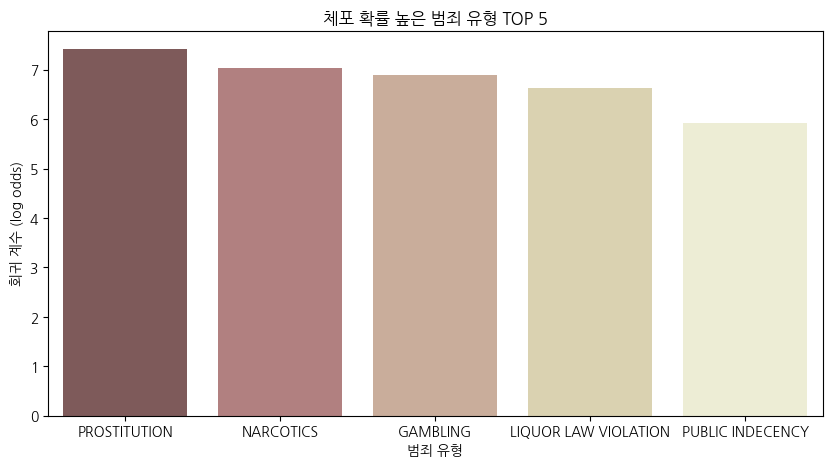

<ipython-input-23-8f92fe1ec1e8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5, x='Primary Type', y='coef', palette='Blues_r')


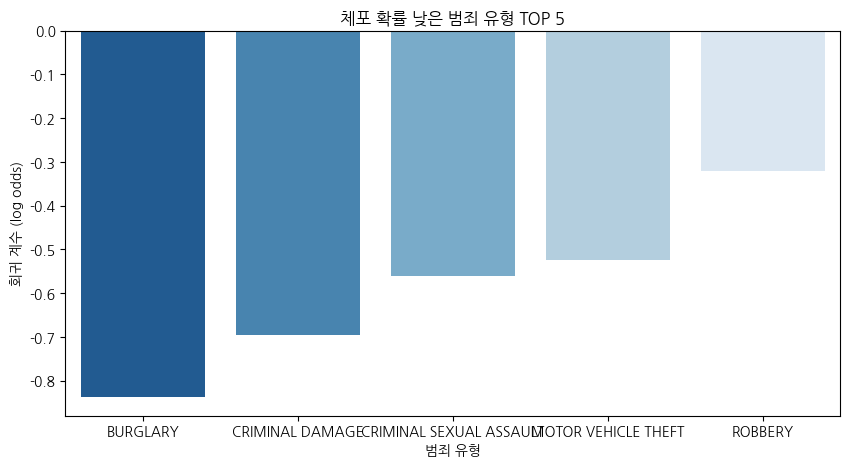

In [23]:
# Ï≤¥Ìè¨ ÌôïÎ•† ÎÜíÏùÄ Î≤îÏ£Ñ
plt.figure(figsize=(10, 5))
sns.barplot(data=top5, x='Primary Type', y='coef', palette='pink')
plt.title('Ï≤¥Ìè¨ ÌôïÎ•† ÎÜíÏùÄ Î≤îÏ£Ñ Ïú†Ìòï TOP 5')
plt.ylabel('ÌöåÍ∑Ä Í≥ÑÏàò (log odds)')
plt.xlabel('Î≤îÏ£Ñ Ïú†Ìòï')
plt.show()

# Ï≤¥Ìè¨ ÌôïÎ•† ÎÇÆÏùÄ Î≤îÏ£Ñ
plt.figure(figsize=(10, 5))
sns.barplot(data=bottom5, x='Primary Type', y='coef', palette='Blues_r')
plt.title('Ï≤¥Ìè¨ ÌôïÎ•† ÎÇÆÏùÄ Î≤îÏ£Ñ Ïú†Ìòï TOP 5')
plt.ylabel('ÌöåÍ∑Ä Í≥ÑÏàò (log odds)')
plt.xlabel('Î≤îÏ£Ñ Ïú†Ìòï')
plt.show()